In [1]:
! # ls Datasets/scrapped/All
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/Training Dataset"


Fire  NoFire


In [3]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [4]:
DATADIR = '/content/drive/My Drive/Training Dataset'
CATEGORIES = ['Fire', 'NoFire']

In [5]:
IMG_SIZE = 64
def create_training_data():
    training_data = []
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

    return training_data

In [7]:
training_data = create_training_data()


100%|██████████| 1301/1301 [00:51<00:00, 25.49it/s]


In [8]:
import random

print(len(training_data))
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

2423
1
0
0
1
1
1
1
1
1
1


In [14]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0
X.shape[1:]

Y = np.array(Y)


In [15]:
# # set up image augmentation
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     horizontal_flip=True,
#     width_shift_range=0.1,
#     height_shift_range=0.1
#     #zoom_range=0.3
#     )
# datagen.fit(X)

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D

model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=2, activation = 'softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])




In [17]:
history = model.fit(X, Y, batch_size=32, epochs=100,validation_split=0.3)
# model.fit_generator(datagen.flow(X, Y, batch_size=32),
#                     epochs=100,
#                     verbose=1)


Epoch 1/100
53/53 [==============================] - 5s 72ms/step - loss: 0.5977 - accuracy: 0.6745 - val_loss: 0.5569 - val_accuracy: 0.7276
Epoch 2/100
53/53 [==============================] - 5s 93ms/step - loss: 0.5263 - accuracy: 0.7500 - val_loss: 0.4774 - val_accuracy: 0.7730
Epoch 3/100
53/53 [==============================] - 4s 68ms/step - loss: 0.4824 - accuracy: 0.7801 - val_loss: 0.5205 - val_accuracy: 0.7469
Epoch 4/100
53/53 [==============================] - 3s 64ms/step - loss: 0.4576 - accuracy: 0.7930 - val_loss: 0.4921 - val_accuracy: 0.7620
Epoch 5/100
53/53 [==============================] - 4s 78ms/step - loss: 0.4379 - accuracy: 0.8113 - val_loss: 0.4527 - val_accuracy: 0.7758
Epoch 6/100
53/53 [==============================] - 4s 78ms/step - loss: 0.4114 - accuracy: 0.8237 - val_loss: 0.4093 - val_accuracy: 0.8033
Epoch 7/100
53/53 [==============================] - 3s 63ms/step - loss: 0.4153 - accuracy: 0.8184 - val_loss: 0.4842 - val_accuracy: 0.7524
Epoch 

In [18]:
model.save('TrainedModels/Fire-64x64-color-v7.1-soft.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


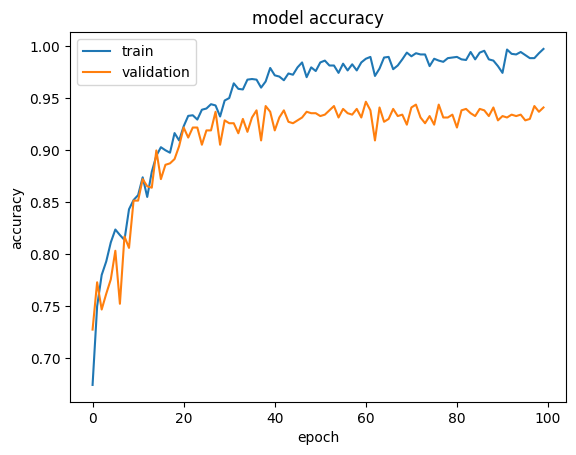

In [21]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy']) # since tensorflow 2.x version, acc -> accuracy
plt.plot(history.history['val_accuracy']) # val_acc -> val_accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

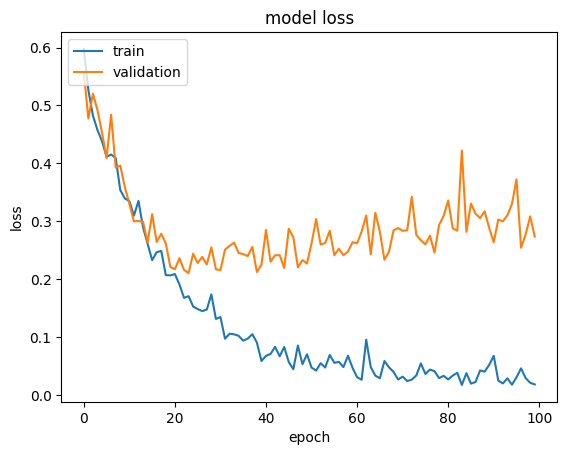

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
model = tf.keras.models.load_model('TrainedModels/Fire-64x64-color-v7.1-soft.h5')

# model.fit_generator(datagen.flow(X, Y, batch_size=32),
#                     epochs=100,
#                   verbose=1)

In [27]:
# plot_model(model, to_file='model_small.svg', show_layer_names=False, show_shapes=True)